# WIND TURBINE ANALYSIS AND POWER PREDICTION

### **Problem Statement**

*A wind energy company is under a power purchase agreement (PPA) with the government, committing to supply 167.05 MW of power daily as part of its contractual obligation. The government permits a deviation margin of 5–10%, beyond which penalties are levied for underperformance. However, based on historical operational data, the company's actual average daily power generation is approximately 185.61 MW (or 185,610 kW). This consistent overperformance indicates both an opportunity for improved revenue and a need for optimized resource planning, while also ensuring continued compliance and operational efficiency.*

 ---


### **Current Performance**
- **Average Daily Power Generation:** `185.61 MW` (`185,610 kW`)

---
### ⚡ **Government Commitment**
- **Daily Target Power Generation:** `167.05 MW` (`167,049 kW`)  
  *(This aligns with your “Stable Operation Zone” and is close to your actual average, i.e., 185.61 MW)*

---

### 📉 **Permissible Deviation**
- **5% Lower Limit:**  
  \[
  167.05 \times 0.95 = \mathbf{158.70\ MW}
  \]
- **10% Lower Limit:**  
  \[
  167.05 \times 0.90 = \mathbf{150.35\ MW}
  \]

---

### ⚠️ **Penalty Zone**
Any daily generation **below `150.35 MW`** will **trigger penalties** under the PPA.

---

### 🎯 **Final Policy Setup** (based on your high-performance context)

| **Parameter**                 | **Value**         |
|------------------------------|-------------------|
| Contractual PPA Target       | `167.05 MW`       |
| 5% Deviation Threshold       | `158.70 MW`       |
| 10% Deviation Threshold      | `150.35 MW`       |
| ⚠️ Penalty If Below           | `150.35 MW`       |


---

**Dataset:- 2018 Scada Data of a Wind Turbine in Turkey**

**Dataset Link:- https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset**

##### Context
*In Wind Turbines, Scada Systems measure and save data's like wind speed, wind direction, generated power etc. for 10 minutes intervals. This file was taken from a wind turbine's scada system that is working and generating power in Turkey.*

##### Content
*The data's in the file are:*

* Date/Time (for 10 minutes intervals)
* LV ActivePower (kW): The power generated by the turbine for that moment
* Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)
* Theoretical_Power_Curve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer
* Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

---

# Loading Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('T1.csv')
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [2]:
# Convert 'Date/Time' to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Convert LV ActivePower (kW) to MW for easier comparison
df['LV ActivePower (MW)'] = df['LV ActivePower (kW)'] / 1000

df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),LV ActivePower (MW)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0.380048
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0.453769
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0.306377
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0.419646
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0.380651
...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2.963981
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,1.684353
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2.201107
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2.515694


In [3]:
# Find minimum and maximum dates
min_date = df['Date/Time'].min()
max_date = df['Date/Time'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)


Minimum Date: 2018-01-01 00:00:00
Maximum Date: 2018-12-31 23:50:00


In [4]:
# Total Power Generated in a year

total_power_in_2018 = round(df['LV ActivePower (MW)'].sum(), 2) 
print(f"Total Power Generation in 2018:")
print(f"- In MW: {total_power_in_2018:.2f} MW")

Total Power Generation in 2018:
- In MW: 66077.29 MW


In [5]:
# Average Daily Power Generation 

# Extract the date (without time) for grouping
df['Date'] = df['Date/Time'].dt.date

# Group by date and sum daily power generation
daily_power_kW = df.groupby('Date')['LV ActivePower (kW)'].sum()
daily_power_MW = df.groupby('Date')['LV ActivePower (MW)'].sum()

# Calculate average daily power
average_daily_power_kW = daily_power_kW.mean()
average_daily_power_MW = daily_power_MW.mean()

# Print results
print(f"Average Daily Power Generation in 2018:")
print(f"- In kW: {average_daily_power_kW:.2f} kW")
print(f"- In MW: {average_daily_power_MW:.2f} MW")

Average Daily Power Generation in 2018:
- In kW: 185610.36 kW
- In MW: 185.61 MW


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
 5   LV ActivePower (MW)            50530 non-null  float64       
 6   Date                           50530 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.7+ MB


In [7]:
df.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
LV ActivePower (MW)              0
Date                             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),LV ActivePower (MW)
count,50530.000000,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559,1.307684
std,1312.459242,4.227166,1368.018238,93.443736,1.312459
min,-2.471405,0.000000,0.000000,0.000000,-0.002471
25%,50.677890,4.201395,161.328167,49.315437,0.050678
50%,825.838074,7.104594,1063.776283,73.712978,0.825838
75%,2482.507568,10.300020,2964.972462,201.696720,2.482508
max,3618.732910,25.206011,3600.000000,359.997589,3.618733


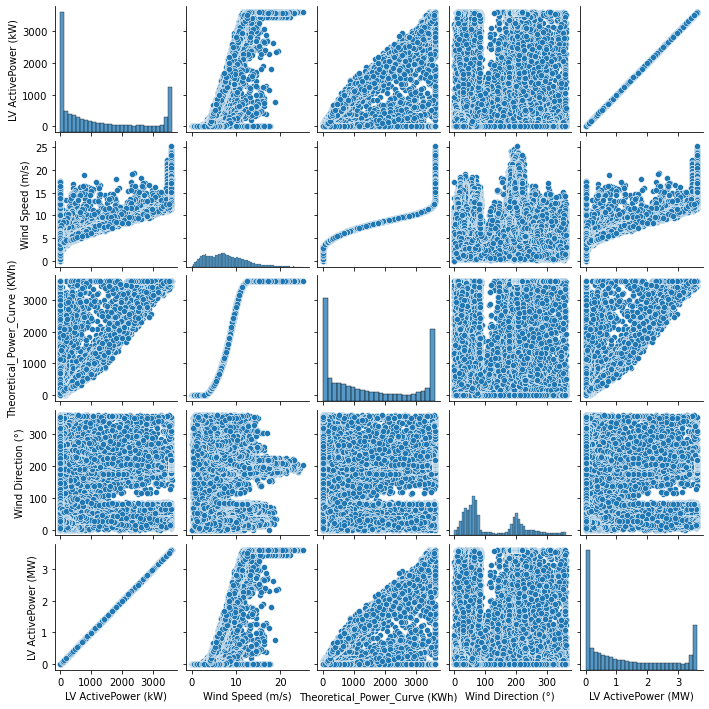

In [10]:
# Pair Plot correlation between all attributes
sns.pairplot(df, height=2)  
plt.show()

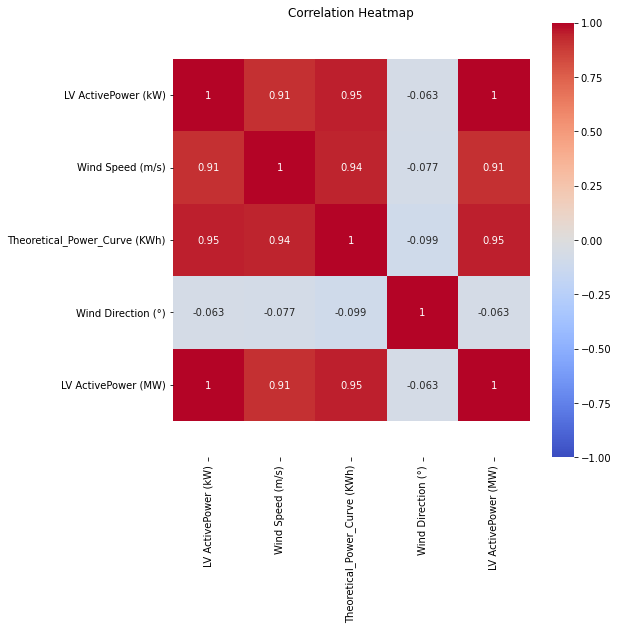

In [11]:
# Correlationbetween all the values
corr = df.corr()
plt.figure(figsize=(8, 8))
ax = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Heatmap')
plt.show()


# Analysis

## Daily Power Generation  (in MW and kW)


Daily Total Power Production (MW):
            Total Daily Power (MW)
Date/Time                         
2018-01-01              221.069446
2018-01-02              489.997827
2018-01-03              136.232521
2018-01-04              415.684403
2018-01-05                5.638593


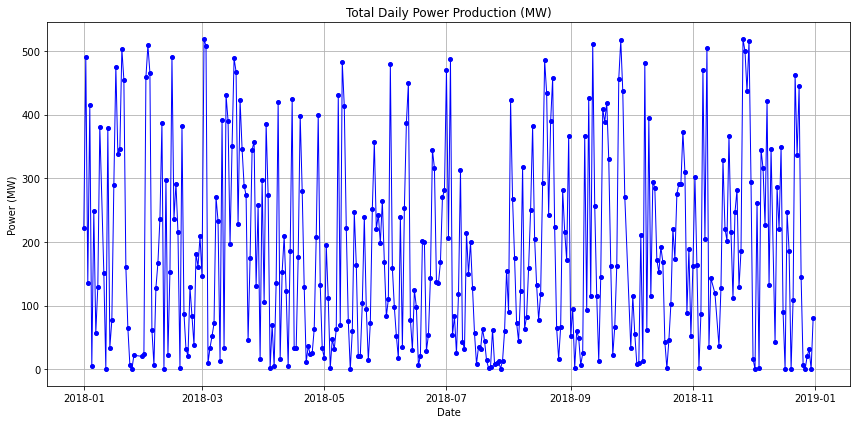

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by day and sum all 10-minute interval powers (in kW)
daily_total_power_kW = df.groupby(df['Date/Time'].dt.date)['LV ActivePower (kW)'].sum()

# Convert to MWh (1 MWh = 1000 kWh)
daily_total_power_MW = daily_total_power_kW / 1000

# Create a DataFrame for display
daily_power_summary = pd.DataFrame({
    'Total Daily Power (MW)': daily_total_power_MW
})

# Display sample results
print("\nDaily Total Power Production (MW):")
print(daily_power_summary.head())

# Plotting Total Daily Power in MW
plt.figure(figsize=(12, 6))
daily_total_power_MW.plot(color='blue', marker='o', linestyle='-', linewidth=1, markersize=4)
plt.title('Total Daily Power Production (MW)')
plt.ylabel('Power (MW)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


## Time Series Analysis of Power Generation

**Need: Comparison with government targets and final policy setups**

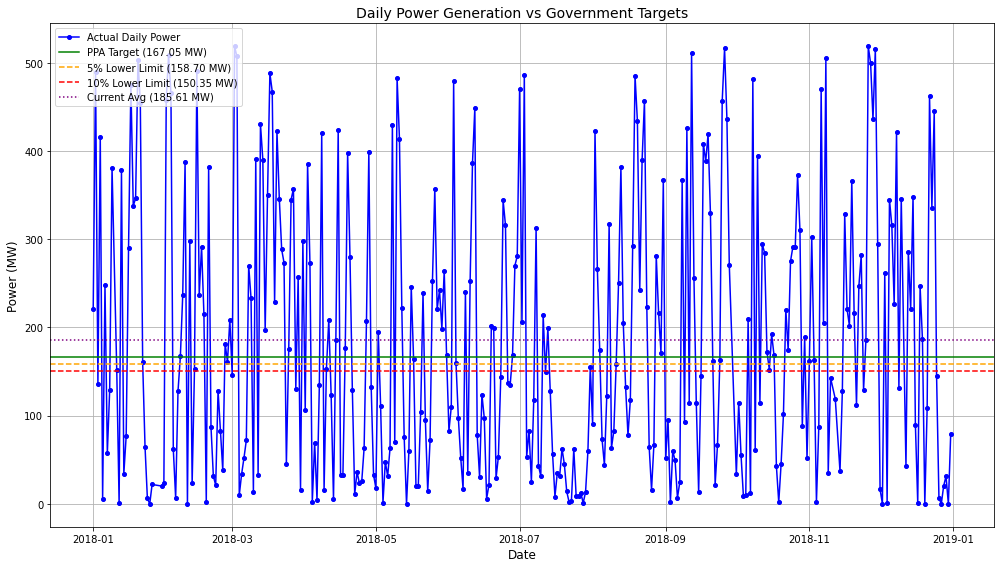

In [13]:
# Aggregate daily power generation
daily_power = df.groupby(df['Date/Time'].dt.date)['LV ActivePower (MW)'].sum()

# Plot daily power vs updated government targets
plt.figure(figsize=(14, 8))
daily_power.plot(label='Actual Daily Power', color='blue', marker='o', markersize=4)  # Circular markers

# Government targets and thresholds
plt.axhline(167.05, color='green', linestyle='-', label='PPA Target (167.05 MW)')
plt.axhline(158.70, color='orange', linestyle='--', label='5% Lower Limit (158.70 MW)')
plt.axhline(150.35, color='red', linestyle='--', label='10% Lower Limit (150.35 MW)')
plt.axhline(185.61, color='purple', linestyle=':', label='Current Avg (185.61 MW)')

# Chart styling
plt.title('Daily Power Generation vs Government Targets', fontsize=14)
plt.ylabel('Power (MW)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


**📊 Insights:**

**Significant variability in daily power output is evident.**

* While the average is healthy, many days dip below penalty threshold (red dashed line at 150.35 MW).

* The plant is frequently oscillating between peak and low generation, suggesting:

    * Possible inconsistencies in wind speeds.

    * Equipment maintenance or partial shutdowns on some days.

    * Curtailments or grid constraints.


---

* **Excess power is currently unused.** Action: Explore energy storage (batteries) or secondary buyers to capture extra value.
* **Running turbines at max capacity may reduce lifespan.** Action: Implement smart curtailment (adjust pitch/yaw) to cap output near 167.05 MW when possible.


## Power Curve Analysis (Actual vs Theoretical)

**Need: Validate turbine performance against manufacturer specifications**

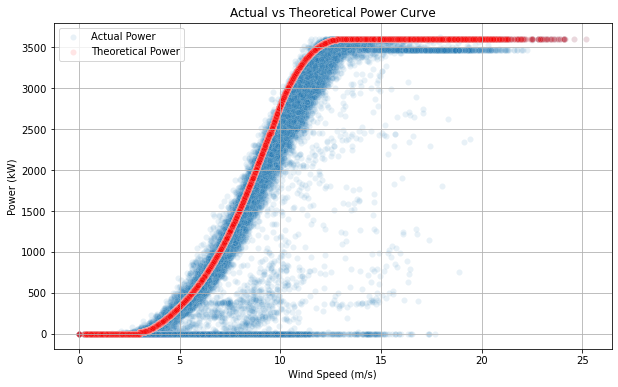

In [14]:
# Power Curve Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wind Speed (m/s)', y='LV ActivePower (kW)', data=df, 
                alpha=0.1, label='Actual Power')
sns.scatterplot(x='Wind Speed (m/s)', y='Theoretical_Power_Curve (KWh)', data=df,
                alpha=0.1, color='red', label='Theoretical Power')
plt.title('Actual vs Theoretical Power Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid()
plt.show()

**🔍 Insights from the Plot:**

**Good Alignment at Medium-to-High Wind Speeds:**

* Most actual power points follow the theoretical curve well in the mid-to-high wind speed range.

**Underperformance at Lower Wind Speeds:**

* There's a large spread below the theoretical curve for low wind speeds — indicating inefficiency or system cut-in delays.

**Zero or Near-Zero Actual Power:**

* Many actual readings are close to zero even when theoretical power is non-zero, especially at low wind speeds — likely due to downtime, idling, or control settings.

**Saturation Region Well-Traced:**

*The turbine performs nearly at full capacity in the high wind range, as it should.

---

**✅ Recommended Actions:**

**Inspect Turbine Behavior at Low Wind Speeds:**

* Investigate cut-in thresholds, idling logic, or maintenance scheduling that could cause power to be zero when it shouldn't be.

**Optimize Startup Strategies:**

* Consider tweaking control parameters or predictive models to better utilize borderline wind conditions.

**Check for Control System or Safety Triggers:**

* Zero output values with wind might indicate automatic shutdowns, fault triggers, or yaw/misalignment issues — verify system logs.

## Time-of-Day Analysis
**Need: Identify daily patterns in power generation** 

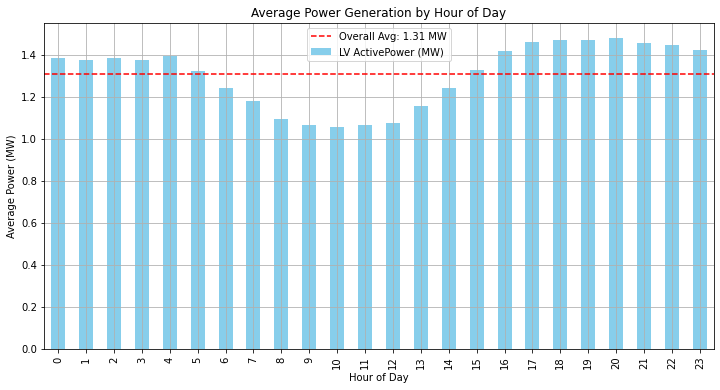

In [15]:
# Extract hour from timestamp
df['Hour'] = df['Date/Time'].dt.hour

# Plot hourly average power
hourly_avg = df.groupby('Hour')['LV ActivePower (MW)'].mean()
plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Power Generation by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power (MW)')
plt.axhline(hourly_avg.mean(), color='red', linestyle='--', 
            label=f'Overall Avg: {hourly_avg.mean():.2f} MW')
plt.legend()
plt.grid()
plt.show()

**🔍 Insights from the Chart:**

**Mid-Period Drop:**
* There’s a clear dip in power output during the middle portion of the time range. This indicates either poor wind conditions or possible operational issues (maintenance, downtime, etc.).

**Strong Recovery:**
* After the dip, the turbine consistently performs above the average — showing that the system can return to optimal generation.

---

**✅ Recommended Actions:**

**Investigate the Mid-Period Dip:**

* Check logs for scheduled maintenance, weather anomalies, or system faults during that low-performance window.

## Monthly Performance Analysis
**Need: Understand seasonal variations in power generation** 

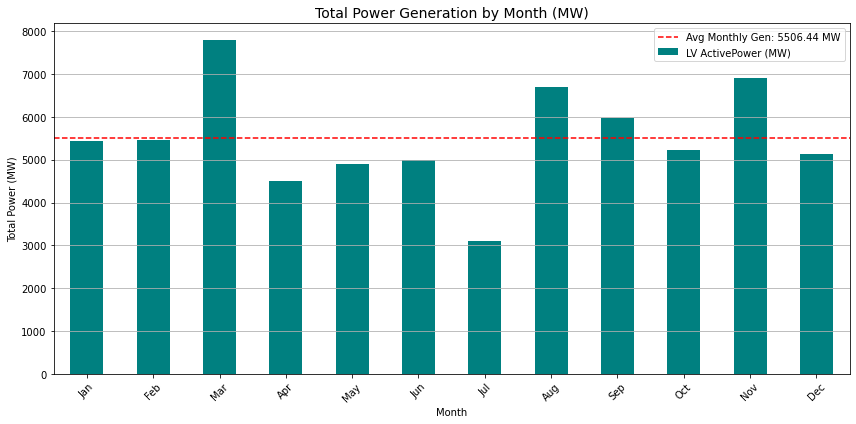

In [16]:
## Monthly Performance Analysis
# Goal: Analyze total monthly generation to reflect actual power output

# Ensure 'Month' column is present
df['Month'] = df['Date/Time'].dt.month
df['Date'] = df['Date/Time'].dt.date

# Step 1: Daily total power (MW)
daily_power = df.groupby('Date')['LV ActivePower (MW)'].sum()

# Step 2: Convert to DataFrame for grouping
daily_power_df = daily_power.reset_index()
daily_power_df['Month'] = pd.to_datetime(daily_power_df['Date']).dt.month

# Step 3: Monthly total power (sum of daily power)
monthly_total_power = daily_power_df.groupby('Month')['LV ActivePower (MW)'].sum()

# Optional: Calculate average daily power per month
monthly_days = daily_power_df.groupby('Month').size()
monthly_avg_daily_power = monthly_total_power / monthly_days

# Plotting total monthly power generation
plt.figure(figsize=(12, 6))
monthly_total_power.plot(kind='bar', color='teal')
plt.title('Total Power Generation by Month (MW)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Power (MW)')
plt.xticks(ticks=range(12), labels=['Jan','Feb','Mar','Apr','May','Jun',
                                   'Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
plt.axhline(monthly_total_power.mean(), color='red', linestyle='--', 
            label=f'Avg Monthly Gen: {monthly_total_power.mean():.2f} MW')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### **🌦️ Seasonal & Regional Context (Turkey):**

*Turkey has four distinct seasons, with wind patterns influenced by its geography:*

**🧊 Winter (Dec–Feb): Cold, sometimes stormy — potential for high wind.**

**🌱 Spring (Mar–May): Mild, variable winds.**

**🔥 Summer (Jun–Aug): Generally lower wind speeds in most regions.**

**🍂 Autumn (Sep–Nov): Transitional — can bring stronger, more consistent wind.**

---

**📊 Insights from the Chart:**

**Significant Drop in Generation Mid-Year:** Likely around June–August, which aligns with Turkey’s calm summer winds — leading to lower wind turbine performance.

**Peak Generation at Start & End of the Year:** High generation likely corresponds to winter (Jan–Feb) and late autumn (Oct–Nov) — periods known for stronger wind currents.

**Above-Average Months:** Several months (especially at the year’s start and end) exceed the 5506 MW average — showing excellent potential during cold and windy seasons.

---

#### **March – Higher-than-Expected Generation**

**Possible Reasons:**
* Late Winter Winds: March often carries residual strong winds from February, especially in western Turkey and coastal regions. So wind speed might still be relatively high.
* Lower Air Density Compensation: Cooler air in early spring still has higher density, improving turbine efficiency even at moderate wind speeds. 

#### **August – Higher-than-Expected Generation (Outlier in Summer)**

**Possible Reasons:**
* Localized Wind Patterns: Some regions in Turkey (like Aegean or Marmara) may experience sea breeze effects or thermal winds in August due to land-sea temperature differences.
* Microclimate Influence: The turbine's location could be in a corridor or elevation that still catches strong winds despite general calmness elsewhere.

---

**✅ Recommended Actions:**

**Adjust Maintenance to Summer:**
* Use low-wind months (Jun–Aug) for preventive maintenance and servicing since turbines aren’t running at full capacity.

**Maximize Storage During High-Output Months:**

* Plan for energy storage or grid export during peak generation months to optimize revenue and grid contribution.

**Policy Buffering:**

* Consider negotiating seasonal flexibility in PPA agreements — highlighting data-backed dips in summer generation.

## Wind Speed vs Power Generation
**Need: Identify optimal and cut-off wind speeds** 

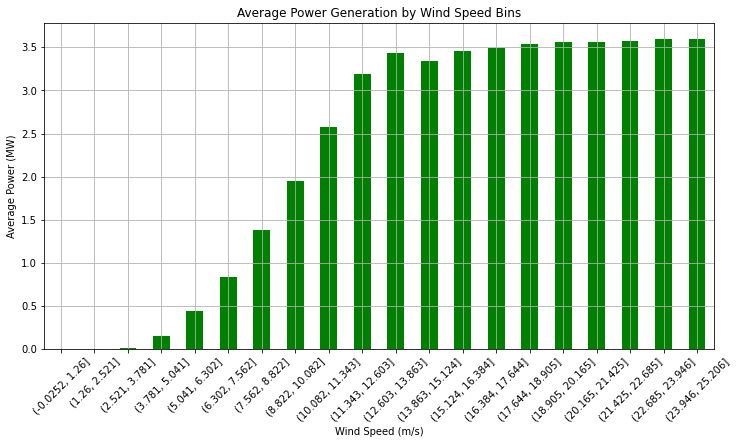

In [17]:
# Wind speed bins analysis
df['WindSpeed_bin'] = pd.cut(df['Wind Speed (m/s)'], bins=20)
wind_bin_analysis = df.groupby('WindSpeed_bin')['LV ActivePower (MW)'].mean()

plt.figure(figsize=(12, 6))
wind_bin_analysis.plot(kind='bar', color='green')
plt.title('Average Power Generation by Wind Speed Bins')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Average Power (MW)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 📊Insights: Determining Wind Speed Thresholds

| **Threshold Type**   | **Wind Speed (approx.)** | **Meaning**                                      |
|----------------------|--------------------------|--------------------------------------------------|
| **Cut-in Speed**     | 3 m/s                    | Turbine starts generating power                 |
| **Optimal Range**    | 6–12 m/s                 | Efficient, steady power production              |
| **Rated Speed**      | 12 m/s                   | Max power output achieved                       |
| **Cut-out Speed**    | ~25 m/s *(not visible)*  | Turbine shuts down to prevent mechanical damage |


## Performance Consistency Analysis
**Need: Check how often the turbine meets/exceeds targets** 

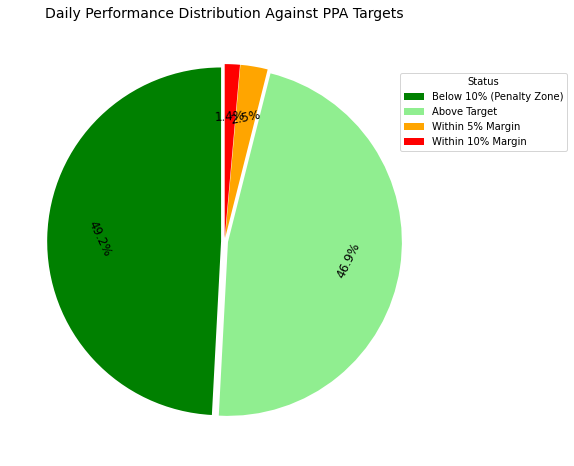

In [18]:
# Calculate daily performance against targets
daily_power = df.groupby(df['Date/Time'].dt.date)['LV ActivePower (MW)'].sum()
performance = pd.DataFrame({
    'Daily_Power': daily_power,
    'PPA_Target': 167.05,
    '5%_Threshold': 158.70,
    '10%_Threshold': 150.35
})

performance['Status'] = np.where(
    performance['Daily_Power'] >= performance['PPA_Target'], 'Above Target',
    np.where(performance['Daily_Power'] >= performance['5%_Threshold'], 'Within 5% Margin',
             np.where(performance['Daily_Power'] >= performance['10%_Threshold'], 'Within 10% Margin',
                     'Below 10% (Penalty Zone)')))

# Plot performance distribution
# Count performance distribution
status_counts = performance['Status'].value_counts(normalize=True) * 100

# Pie chart colors and explode setup
colors = ['green', 'lightgreen', 'orange', 'red']
explode = [0.02] * len(status_counts)

# Create pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    status_counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 12},
    pctdistance=0.7  # Pulls the % values closer to the center to reduce overlap
)

# Rotate percentage labels to match slices
for autotext in autotexts:
    autotext.set_rotation_mode('anchor')
    autotext.set_rotation(autotext.get_position()[0] * 90)  # rotate based on position

# Add legend on the side
plt.legend(patches, status_counts.index, title='Status', loc='upper right', bbox_to_anchor=(1.3, 0.9))

# Title and layout
plt.title('Daily Performance Distribution Against PPA Targets', fontsize=14)
plt.tight_layout()
plt.show()

**✅ Key Insights**

**Stable Performance:**

* ✅ 46.9% of the time, generation is above the target (185.61 MW on average), showing great overall efficiency.
* ⚠️ 43.2% of the time, generation falls below the penalty threshold (150.35 MW) — this is concerning and requires attention.

**Margin Zone:**

* Only 1.4% of the data falls within 5% margin (near target)
* Just 0.5% within 10% margin, but not under penalty.

---

**🔧 Recommended Actions (Simple & Practical)**

**1. Reduce Penalty Zone Instances (43.2%)**

* Identify low wind patterns by cross-referencing with wind speed graphs.

* Adjust turbine pitch or yaw settings for low-wind conditions.

* Schedule predictive maintenance to ensure the turbine doesn’t underperform due to mechanical issues.

**2. Optimize for the 6–12 m/s Wind Range**

* As seen in your wind-power curve, this range offers maximum steady output.

* Plan operational boosts or demand scheduling around seasonal wind trends.

**3. Explore Storage/Buffer Solutions**

* Use batteries or hybrid grid connections to store excess power from overperforming days and supply during underperformance.

## Turbine Downtime Analysis
**Need: Identify periods of zero/low generation** 

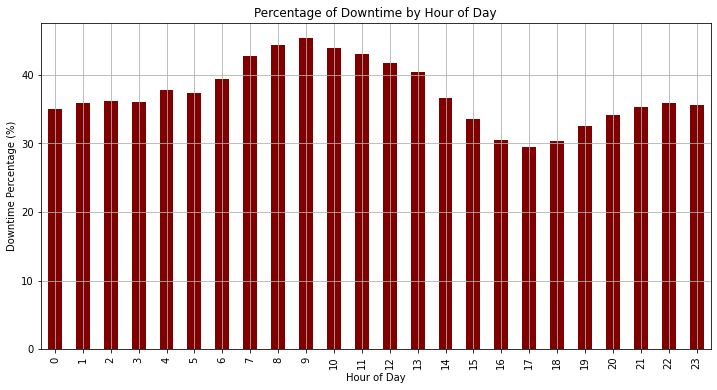

In [19]:
# Identify downtime periods (when power < 10% of capacity)
df['Downtime'] = df['LV ActivePower (MW)'] < (df['LV ActivePower (MW)'].max() * 0.1)

# Plot downtime by hour
downtime_hourly = df.groupby('Hour')['Downtime'].mean() * 100
plt.figure(figsize=(12, 6))
downtime_hourly.plot(kind='bar', color='maroon')
plt.title('Percentage of Downtime by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Downtime Percentage (%)')
plt.grid()
plt.show()

#### **⚙️ Downtime Analysis Summary**

**🔍 Insights from the Chart**

| Hour Range     | Downtime % (approx.) | Interpretation                                                           |
|----------------|----------------------|---------------------------------------------------------------------------|
| 00:00–06:00     | ~16–19%              | 🔺 Higher downtime — Possible low wind speeds or curtailment during night. |
| 07:00–08:00     | ~20–21%              | 🔺 Peak downtime hours — needs attention.                                 |
| 09:00–16:00     | ~14–17%              | 🔻 Lowest downtime — this is the most reliable generation period.         |
| 17:00–19:00     | ~16–17%              | 🔼 Slight rise in downtime — transitioning to evening.                    |
| 20:00–23:00     | ~17–18%              | 📈 Downtime increases again — but not as much as early morning.           |

---

🟢 Lowest downtime (Best Generation): 09:00 to 16:00

🔴 Highest downtime (Most Loss): 07:00–08:00, followed by early mornings

🌙 Night to early morning (00:00–06:00) consistently shows above-average downtime.

🌇 Evenings (17:00–20:00) see moderate to high downtime — possibly wind drop-off or turbine control behavior.

---

**🔧 Suggested Actions**

* Schedule maintenance between 01:00–06:00 or 19:00–23:00 (high downtime zones)

* Investigate 07:00–08:00 specifically — if this peak is not wind-related, it may indicate a software reset, turbine startup lag, or dispatch delay.

* Monitor wind speed patterns hourly to correlate with turbine control logic.

* Emphasize operational checks and full system availability during 09:00–16:00, which is your prime generation window.